The Fourier series tells us the frequency response of repeating signals and the Fourier transform tells us the frequency response of non-repeating signals.

### Discrete Fourier Transform from scratch

The DFT is the most important discrete transform, used to perform Fourier analysis. The function is any quantity or signal that varies over time, such as the pressure of a sound wave, a radio signal, or temperature readings, sampled over a finite time interval (often defined by a window function).

### $ X_k = \sum\limits_{n=0}^{N-1} x_n \cdot e^{-i2\pi \frac{k}{N}n}$

In [1]:
import cmath

def dft(signal):
    N = len(signal)
    res = []
    
    for k in range(N):
        summand = 0
        for n in range(N):
            angle = 2 * cmath.pi * k * n / N
            summand += signal[n] * cmath.exp(-1j * angle)
        # res.append(summand)

        rounded_summand = round(summand.real, 2) + round(summand.imag, 2) * 1j
        res.append(rounded_summand)

    return res

signal = [1, 2, 3, 4]
dft_result = dft(signal)
print(dft_result)


[(10+0j), (-2+2j), (-2+0j), (-2-2j)]


In [2]:
import numpy as np
# With numpy

def dft2(x): 
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

dft2(signal)

array([10.+0.00000000e+00j, -2.+2.00000000e+00j, -2.-9.79717439e-16j,
       -2.-2.00000000e+00j])

In [3]:
# Or simply
np.fft.fft(signal)

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

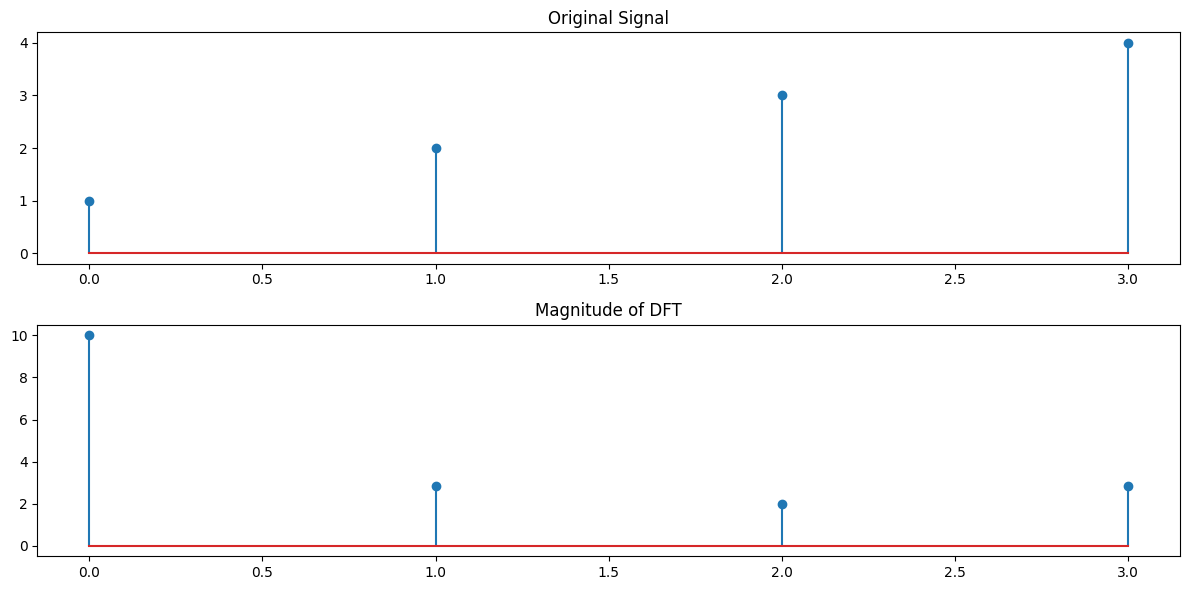

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.stem([abs(i) for i in dft_result])
plt.title('Magnitude of DFT')

plt.tight_layout()
plt.show()

In [5]:
# Similarly, we can inverse it
np.fft.ifft(dft_result)

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j])

In [6]:
cycles = 2
samples = 25

length = np.pi * 2 * cycles
wave = np.sin(np.arange(0, length, length / samples))

array([ 0.        ,  0.48175367,  0.84432793,  0.99802673,  0.90482705,
        0.58778525,  0.12533323, -0.36812455, -0.77051324, -0.98228725,
       -0.95105652, -0.68454711, -0.24868989,  0.24868989,  0.68454711,
        0.95105652,  0.98228725,  0.77051324,  0.36812455, -0.12533323,
       -0.58778525, -0.90482705, -0.99802673, -0.84432793, -0.48175367])

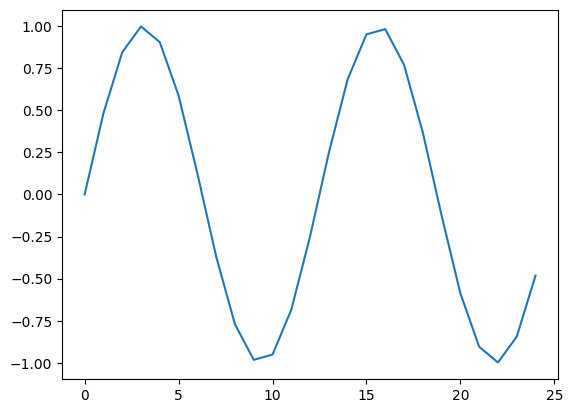

In [7]:
plt.plot(wave)
wave

[0j, 0j, -12.5j, 0j, 0j, 0j, 0j, 0j, 0j, (-0+0j), 0j, (-0+0j), 0j, 0j, (-0+0j), (-0+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 12.5j, 0j]


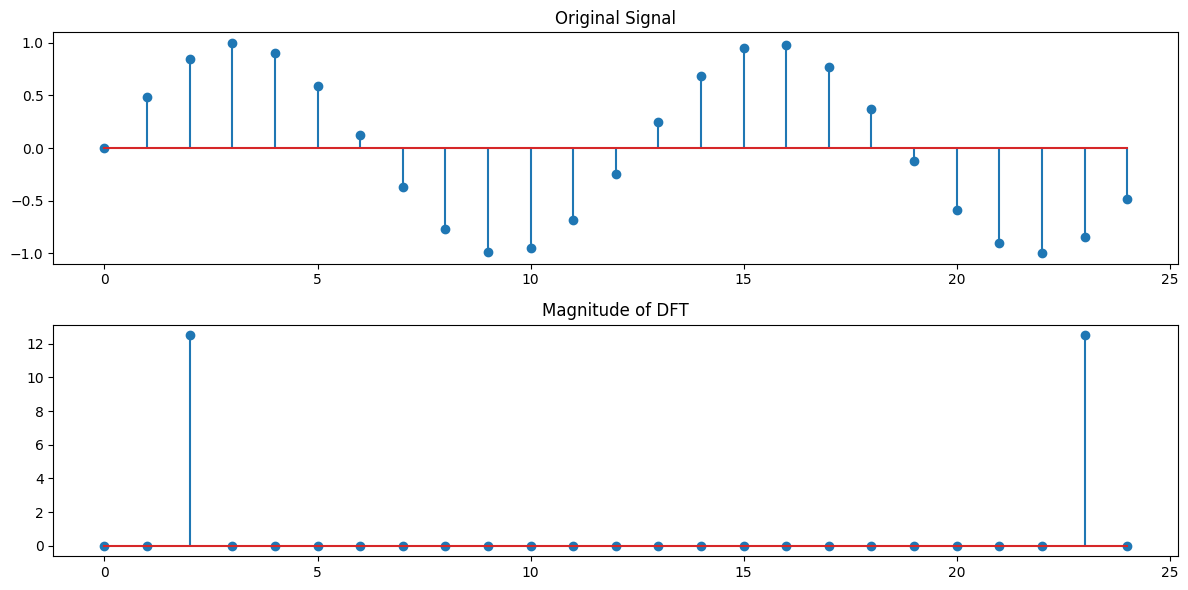

In [8]:
dft_result = dft(wave.tolist())
print(dft_result)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(wave)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.stem([abs(i) for i in dft_result])
plt.title('Magnitude of DFT')

plt.tight_layout()
plt.show()

## Cepstrum

The cepstrum is the inverse Fourier transform of the log of the Fourier transform. So really, a spectrum of a spectrum

In [9]:
fft_wave = np.fft.fft(wave)

log_fft_wave = np.log(np.abs(fft_wave) + 1e-10)  # add tiny value to avoid log(0)

cepstrum_wave = np.fft.ifft(log_fft_wave)

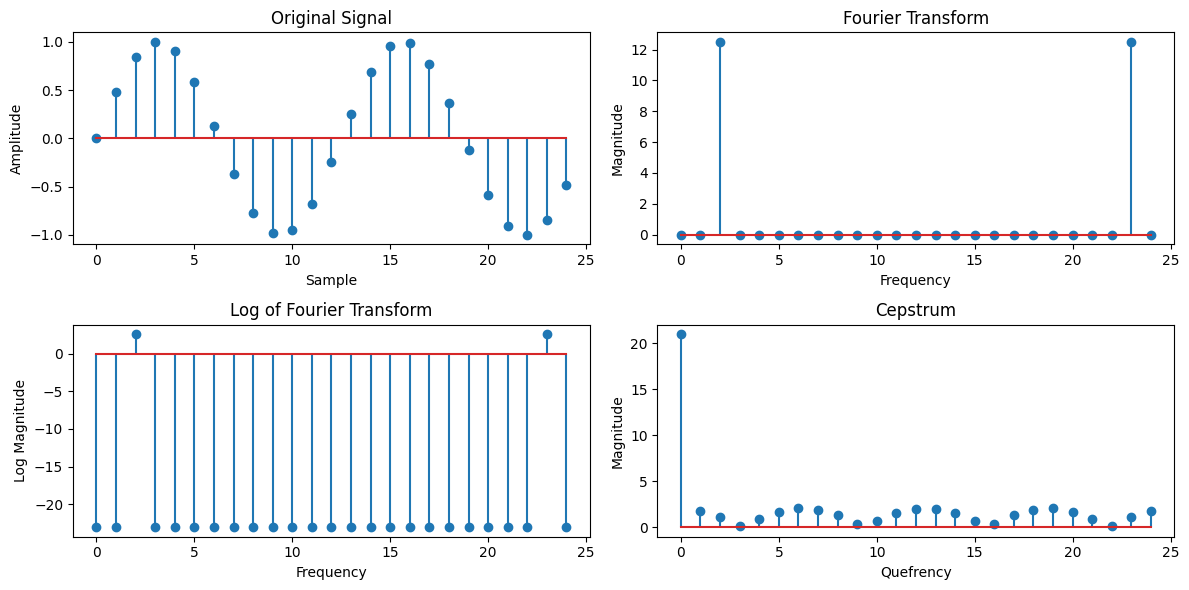

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.stem(wave)
plt.title('Original Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.stem(np.abs(fft_wave))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 3)
plt.stem(log_fft_wave)
plt.title('Log of Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Log Magnitude')

plt.subplot(2, 2, 4)
plt.stem(np.abs(cepstrum_wave))
plt.title('Cepstrum')
plt.xlabel('Quefrency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

The independent variable of a cepstrum is called quefrency. The quefrency is a measure of time, but not in the sense of a signal in the time domain. For example, if the sampling rate of an audio signal is 44100 Hz and there is a large peak in the cepstrum whose quefrency is 100 samples, the peak indicates the presence of a fundamental frequency that is 44100/100 = 441 Hz. This peak occurs in the cepstrum because the harmonics in the spectrum are periodic and the period corresponds to the fundamental frequency, since harmonics are integer multiples of the fundamental frequency.

[wikipedia.org/wiki/Cepstrum#Quefrency](https://en.wikipedia.org/wiki/Cepstrum#Quefrency)

## MFCCs

In [11]:
cycles = 2
samples = 4000
sr = 44100
length = np.pi * 2 * cycles
wave = np.sin(np.arange(0, length, length / samples))

In [12]:
def pre_emphasis(signal, coeff=0.40):
    return np.append(signal[0], signal[1:] - coeff * signal[:-1])

Pre-emphasis compensates for high-frequency loss during regular sound production or transmissions.

$y[n] = x[n]\ - \alpha \cdot x[n-1],$
where $\alpha$, usually around 0.95, is the pre-emphasis coefficient.

In this example we're using a lower $a$ because our sine wave is artificially generated.

((4000,), (4000,))

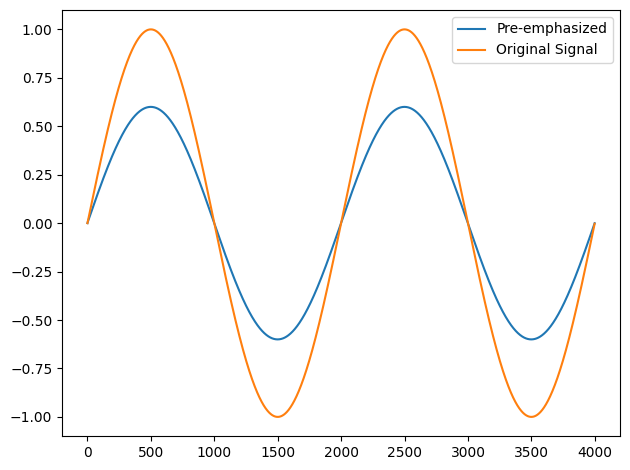

In [13]:
pre_emphasized = pre_emphasis(wave)
plt.plot(pre_emphasized, label='Pre-emphasized')
plt.plot(wave, label='Original Signal')
plt.legend()
plt.tight_layout()
pre_emphasized.shape, wave.shape

In [14]:
def framing(signal, sr, frame_size=0.025, frame_stride=0.01):
    frame_length = int(round(frame_size * sr))
    frame_step = int(round(frame_stride * sr))
    signal_length = len(signal)
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(signal, z)

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

We split the signal into overlapping frames, conventionally 20-40 ms in duration.

With a frame size of 25 ms and a frame stride of 10 ms, each frame overlaps the previous one by 15 ms.

In [15]:
frames = framing(pre_emphasized, 44100)
frames.shape

(7, 1102)

In [16]:
def windowing(frames, frame_length):
    return frames * np.hamming(frame_length)

To minimize the discontinuities and reduce spectral leakage at the beginning and end of each frame we add a window function, such as the Hamming window.

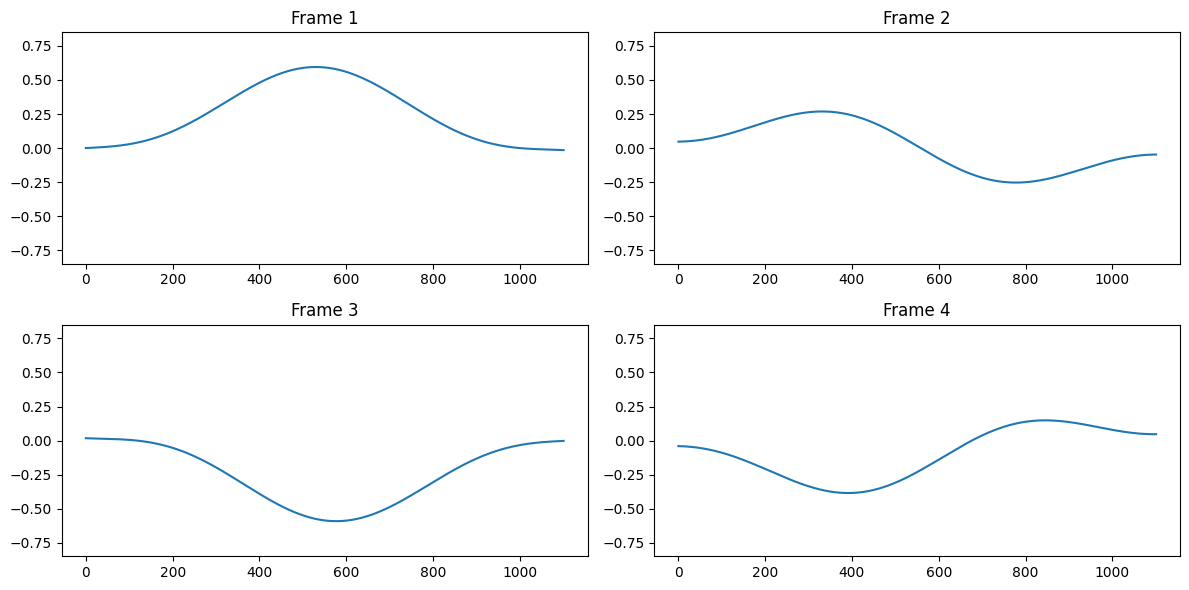

In [17]:
windowed_frames = windowing(frames, frames.shape[1])

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(windowed_frames[i])
    plt.ylim(-0.85, 0.85)
    plt.title(f'Frame {i+1}')

plt.tight_layout()

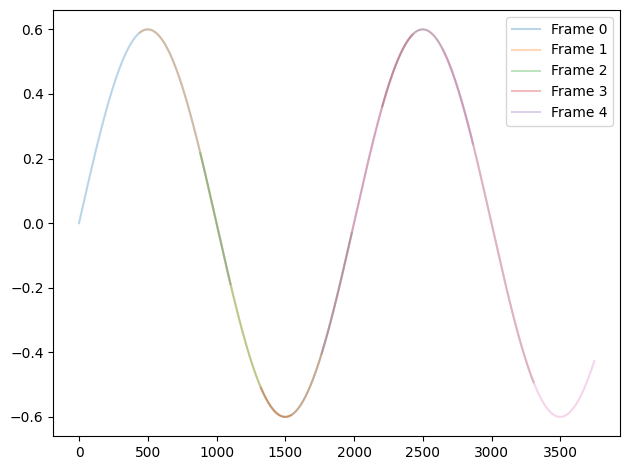

In [18]:
frame_step = int(round(0.01 * 44100)) # 

for i in range(len(frames)):
    plt.plot(np.arange(i * frame_step, i * frame_step + windowed_frames.shape[1]), frames[i], alpha=0.3, label=f'Frame {i}' if i <= 4 else "")

plt.legend()
plt.tight_layout()

In [19]:
def power_spectrum(frames, NFFT): # Number of Points for FFT
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))
    pow_frames = ((1.0 / NFFT) * (mag_frames ** 2))
    return pow_frames

We apply FFT to each windowed frame to obtain the frequency components. The power spectrum is computed by taking the square of the magnitude of the FFT, scaled by the frame length. The power spectrum provides the distribution of power into frequency components, which is we need to process the signal with Mel filterbanks.

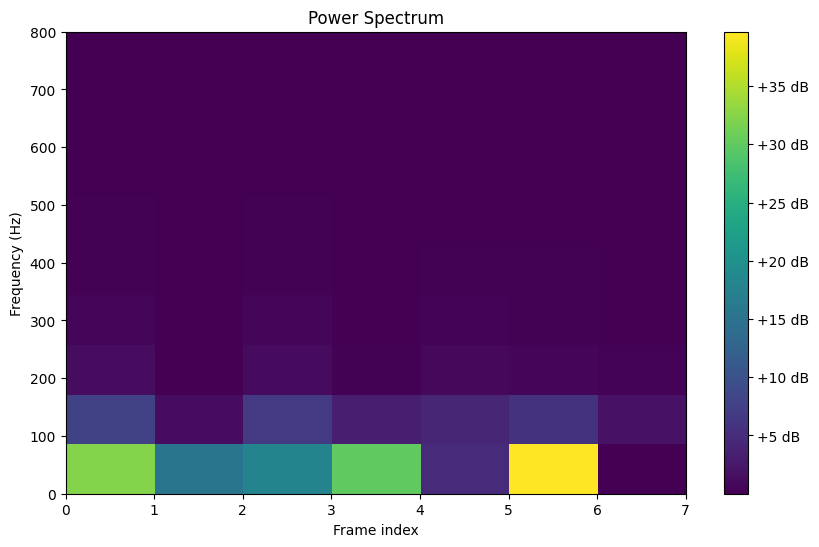

In [20]:
pow_frames = power_spectrum(windowed_frames, NFFT=512)

plt.figure(figsize=(10, 6))
plt.imshow(pow_frames.T, origin='lower', aspect='auto', cmap='viridis', extent=[0, frames.shape[0], 0, sr/2])
plt.ylim(0, 800)
plt.colorbar(format='%+2.0f dB')
plt.title('Power Spectrum')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Frame index')
plt.show()

In [21]:
def mel_filterbank(num_filters, NFFT, sample_rate):
    low_freq_mel = 0
    high_freq_mel = 2595 * np.log10(1 + (sample_rate / 2) / 700)
    mel_points = np.linspace(low_freq_mel, high_freq_mel, num_filters + 2)
    hz_points = 700 * (10 ** (mel_points / 2595) - 1)
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((num_filters, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, num_filters + 1):
        f_m_minus = int(bin[m - 1])
        f_m = int(bin[m])
        f_m_plus = int(bin[m + 1])

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

    return fbank

The Mel scale is a perceptual scale of pitches judged by listeners to be equal in distance from one another. Using the Mel filterbank we map the power spectrum onto the Mel scale, which approximates the  very limited human ear's response.

In [22]:
def apply_mel_filterbank(pow_frames, fbank):
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)
    return 20 * np.log10(filter_banks)

We compress the dynamic range of the filterbank energies by applying the logarithm.
The output of the Mel filterbank is computed by summing the power spectrum components within each filter. This simulates the human ear's sensitivity to loudness, which is more logarithmic than linear.

In [23]:
fbank = mel_filterbank(num_filters=26, NFFT=512, sample_rate=sr)
filter_banks = apply_mel_filterbank(pow_frames, fbank)

In [24]:
from scipy.fftpack import dct

def get_mfccs(log_filter_banks, num_ceps):
    return dct(log_filter_banks, type=2, axis=1, norm='ortho')[:, :num_ceps]

To get the MFCCs, we reduce dimensionality and decorrelate the log filterbank energies.

We apply DCT (Discrete Cosine Transform) to the log filterbank energies to get a set of coefficients, the first is often excluded as it represents the overall energy of the signal.

DCT transforms the log filterbank energies into a set of features that are uncorrelated, making practical for pattern recognition ML tasks. Usually the first 13 coefficients are kept for further processing.

In [25]:
mfccs = get_mfccs(filter_banks, num_ceps=13)

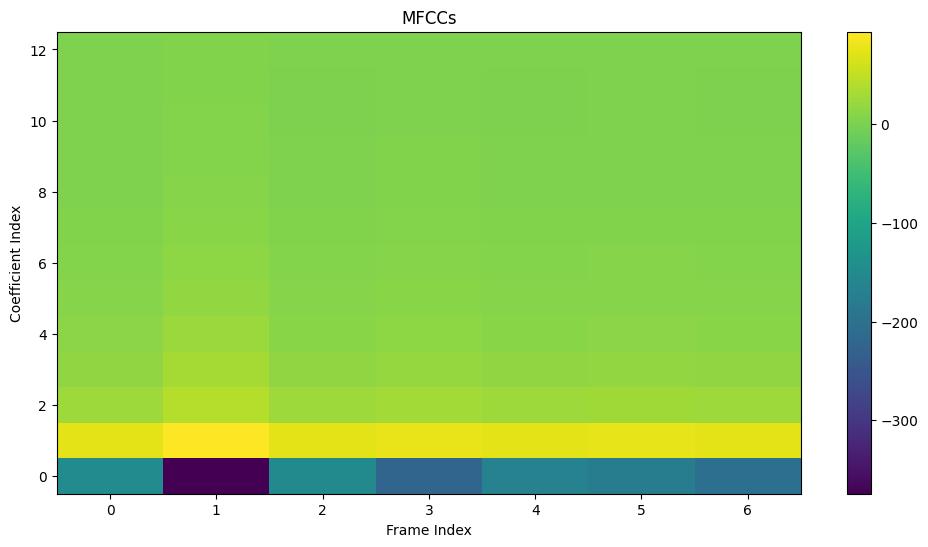

In [26]:
plt.figure(figsize=(12, 6))
plt.imshow(mfccs.T, aspect='auto', origin='lower')
plt.title('MFCCs')
plt.xlabel('Frame Index')
plt.ylabel('Coefficient Index')
plt.colorbar()
plt.show()